# 🔥 Повний курс регресій з поясненнями, фактами та аномаліями
У цьому ноутбуку ми розглянемо **5 основних типів регресій/класів моделей**:
- Linear Regression
- Ridge / Lasso Regression
- Decision Trees
- Random Forest / XGBoost
- Logistic Regression

Для кожної моделі:
- Теорія + цікаві факти
- Аномалії та реальні приклади
- Код з прикладами
- Візуалізації

## 📘 1. Linear Regression
📌 **Суть**: шукає лінійну залежність між змінними.

✅ Факти:
- Виникла в астрономії у XVIII ст. (Гаус, Лежандр).
- Дуже добре працює на простих задачах.
- Використовується для прогнозу інфляції, цін, росту.

❌ Аномалії:
- Чутлива до викидів (одна точка може сильно змінити пряму).
- Якщо є приховані змінні → модель дає неправильні висновки.

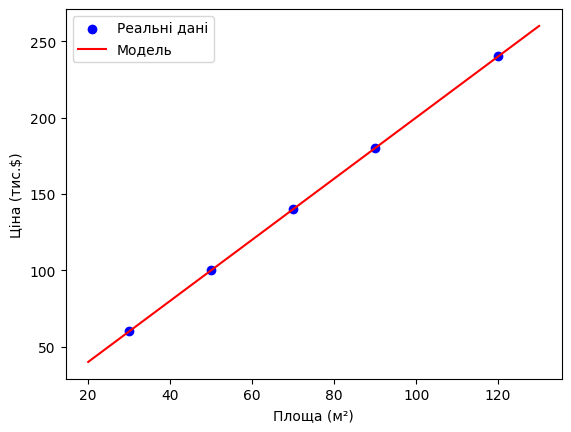

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Дані: площа і ціна квартири
X = np.array([30, 50, 70, 90, 120]).reshape(-1, 1)
y = np.array([60, 100, 140, 180, 240])

model = LinearRegression().fit(X, y)
X_test = np.linspace(20, 130, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

plt.scatter(X, y, color='blue', label='Реальні дані')
plt.plot(X_test, y_pred, color='red', label='Модель')
plt.xlabel('Площа (м²)')
plt.ylabel('Ціна (тис.$)')
plt.legend()
plt.show()

## 📘 2. Ridge / Lasso Regression
📌 **Суть**: додають штраф за великі коефіцієнти.

✅ Факти:
- Ridge зменшує коефіцієнти, але не обнуляє.
- Lasso може обнулити змінні (фактично робить відбір).
- Lasso стало популярним у генетиці (тисячі ознак).

❌ Аномалії:
- Lasso може занадто агресивно зануляти змінні.
- Ridge тримає навіть слабкі фактори.

In [2]:
from sklearn.linear_model import Ridge, Lasso

X = np.random.rand(50, 5)
y = 3*X[:,0] + 2*X[:,1] + np.random.randn(50)

ridge = Ridge(alpha=1.0).fit(X, y)
lasso = Lasso(alpha=0.1).fit(X, y)

print('Коефіцієнти Ridge:', ridge.coef_)
print('Коефіцієнти Lasso:', lasso.coef_)

Коефіцієнти Ridge: [ 1.86323267  1.29033421  0.37056954 -0.47314324  0.02995582]
Коефіцієнти Lasso: [ 1.19488572  0.3786633   0.         -0.         -0.        ]


## 📘 3. Decision Trees
📌 **Суть**: створюють дерево з правилами.

✅ Факти:
- Використовуються в медицині через пояснюваність.
- Популярні у праві, бо можна візуально показати логіку.
- Дуже прості у поясненні.

❌ Аномалії:
- Легко переобладнуються (занадто точні для тренувальних даних).

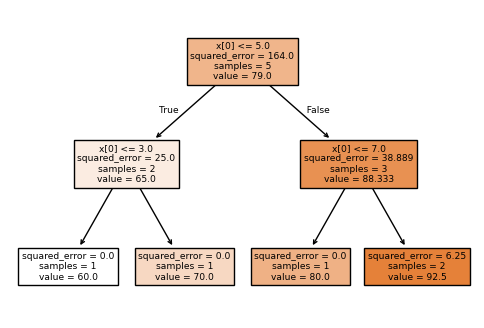

In [3]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

X = np.array([[2],[4],[6],[8],[10]])
y = np.array([60, 70, 80, 90, 95])

tree = DecisionTreeRegressor(max_depth=2).fit(X, y)

plt.figure(figsize=(6,4))
plot_tree(tree, filled=True)
plt.show()

## 📘 4. Random Forest / XGBoost
📌 **Суть**: ансамбль дерев → сильніші моделі.

✅ Факти:
- Random Forest (2001) одразу став популярним.
- XGBoost виграв більшість Kaggle-змагань (2015–2018).
- Дуже добре працюють із табличними даними.

❌ Аномалії:
- RF іноді занадто усереднює.
- XGBoost може захопитися шумом.

In [4]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

X = np.random.rand(100, 2)
y = 3*X[:,0] + 5*X[:,1] + np.random.randn(100)

rf = RandomForestRegressor(n_estimators=50).fit(X, y)
xgb = XGBRegressor(n_estimators=100, verbosity=0).fit(X, y)

print('RF прогноз:', rf.predict([[0.5,0.7]]))
print('XGB прогноз:', xgb.predict([[0.5,0.7]]))

ModuleNotFoundError: No module named 'xgboost'

## 📘 5. Logistic Regression
📌 **Суть**: класифікація (0/1).

✅ Факти:
- Використовується у медицині більше 100 років.
- Логістична функція → S-крива, як ріст популяцій.
- Дуже інтерпретована, тому досі популярна.

❌ Аномалії:
- Чутлива до корельованих змінних.
- Погано працює зі складними межами.

In [6]:
from sklearn.linear_model import LogisticRegression

X = np.array([[2],[4],[6],[8]])
y = np.array([0,0,1,1])

logreg = LogisticRegression().fit(X, y)
print('Ймовірність скласти іспит при X=5:', logreg.predict_proba([[5]]))

Ймовірність скласти іспит при X=5: [[0.49999572 0.50000428]]
